# Title: NBA PERFOMANCE ANALYSIS

<h1 style="font-weight: bold; color: white;">HANNAN MUZAMMIL</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/han023) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hannanmuzammil)

### **Meta-Data (About Dataset)**
#### Context
As a life-long fan of basketball, I always wanted to combine my enthusiasm for the sport with passion for analytics 🏀📊. So, I utilized the NBA Stats API to pull together this data set. I hope it will prove to be as interesting to work with for you as it has been for me!

#### Content
The data set contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc.

The pull initially contained 52 rows of missing data. The gaps have been manually filled using data from Basketball Reference. I am not aware of any other data quality issues.

#### Analysis Ideas
The data set can be used to explore how age/height/weight tendencies have changed over time due to changes in game philosophy and player development strategies. Also, it could be interesting to see how geographically diverse the NBA is and how oversees talents have influenced it. A longitudinal study on players' career arches can also be performed.


##### Explanation of the columns:
* Unnamed - A placeholder column for index numbers, often used to retain the original index during data imports.
* player_name - The full name of the basketball player.
* team_abbreviation - Abbreviation of the player's team name (e.g., HOU for Houston Rockets).
* age - The age of the player during the season.
* player_height - The height of the player (CM) | player_weight - The weight of the player (KG).
* college - The name of the college the player attended before joining the professional league.
* country - The player's country of origin or representation.
* draft_year - The year the player was drafted into the league.
* draft_round - The round of the draft in which the player was selected. | draft_number Indicating the specific pick number.
* gp The total number of games played by the player.
* net_rating - The player's net rating, calculated as the difference between offensive and defensive ratings.
* oreb_pct - Offensive rebound percentage | dreb_pct - Defensive rebound percentage | reb - Average rebounds per game.
* usg_pct - Usage percentage; estimates the percentage of team plays used by the player while on the court.
* ts_pct - True shooting percentage; measures shooting efficiency considering field goals, 3-point field goals, and free throws.
* ast_pct - Assist percentage | ast - Average assists per game by the player.
* pts - Average points scored per game by the player during the season.
* season - The NBA season in which the statistics were recorded (e.g., 1996-97).

In [20]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('nba.csv')

# print the first 5 rows of the dataframe
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


## Exploratory Data Analysis (EDA) and data preprocessing

### Explore each Column

In [3]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [4]:
# data shpae
df.shape

(12844, 22)

In [5]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [7]:
# Checking for missing values in each column of the dataset
# This helps identify columns that may need imputation or handling before further analysis
print("Missing Values per Column:")
df.isnull().sum()

Missing Values per Column:


Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [9]:
# Handling non-numeric values in draft columns and converting them to numeric

# Convert 'draft_year' to numeric, coerce errors to NaN and replace NaNs with 0
df['draft_year'] = pd.to_numeric(df['draft_year'], errors='coerce').fillna(0).astype(int)

# Convert 'draft_round' to numeric, coerce errors to NaN and replace NaNs with 0
df['draft_round'] = pd.to_numeric(df['draft_round'], errors='coerce').fillna(0).astype(int)

# Convert 'draft_number' to numeric, coerce errors to NaN and replace NaNs with 0
df['draft_number'] = pd.to_numeric(df['draft_number'], errors='coerce').fillna(0).astype(int)

# Display the data types of all columns after the conversion
df.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year             int32
draft_round            int32
draft_number           int32
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

Dropping Irrelevant Columns
Here,

Unnamed: 0, team_abbreviation, college, country, season irrelevant object features
Hence, we drop the above columns from the dataframe.

In [11]:
# Define the columns to drop
columns_to_drop = ['Unnamed: 0', 'team_abbreviation', 'college', 'country', 'season']

# Drop the specified columns from the DataFrame, ignoring errors if the column does not exist
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# Display the remaining column names to confirm the columns have been dropped
df.columns

Index(['player_name', 'age', 'player_height', 'player_weight', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

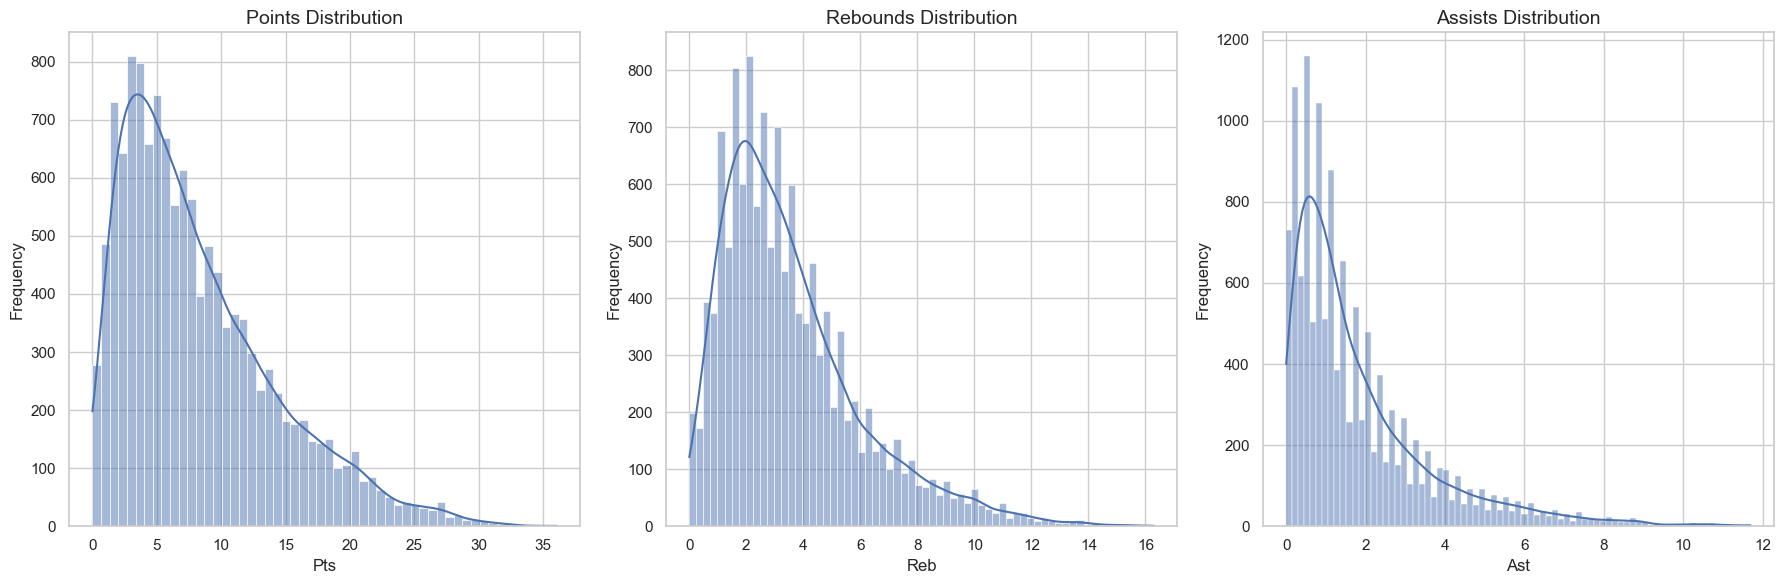

In [12]:
# Set the theme for the plots
sns.set_theme(style="whitegrid")

# Create a figure and axes for the subplots (1 row, 3 columns) to plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of key metrics to plot and their corresponding titles
key_metrics = ['pts', 'reb', 'ast']
titles = ['Points Distribution', 'Rebounds Distribution', 'Assists Distribution']

# Loop through each axis, metric, and title to generate the histograms
for ax, metric, title in zip(axes, key_metrics, titles):
    # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
    sns.histplot(df[metric], kde=True, ax=ax)
    # Set the title and axis labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(metric.capitalize(), fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

Insights from the Distribution of Key Metrics 

1. Points (pts):
    The distribution is right-skewed, with most players scoring under 15 points per game. Few outliers exceed 30 points.
2. Rebounds (reb):
    Similarly, most players average under 8 rebounds per game, with a long tail for outliers.
3. Assists (ast):
    Most players contribute fewer than 5 assists per game.

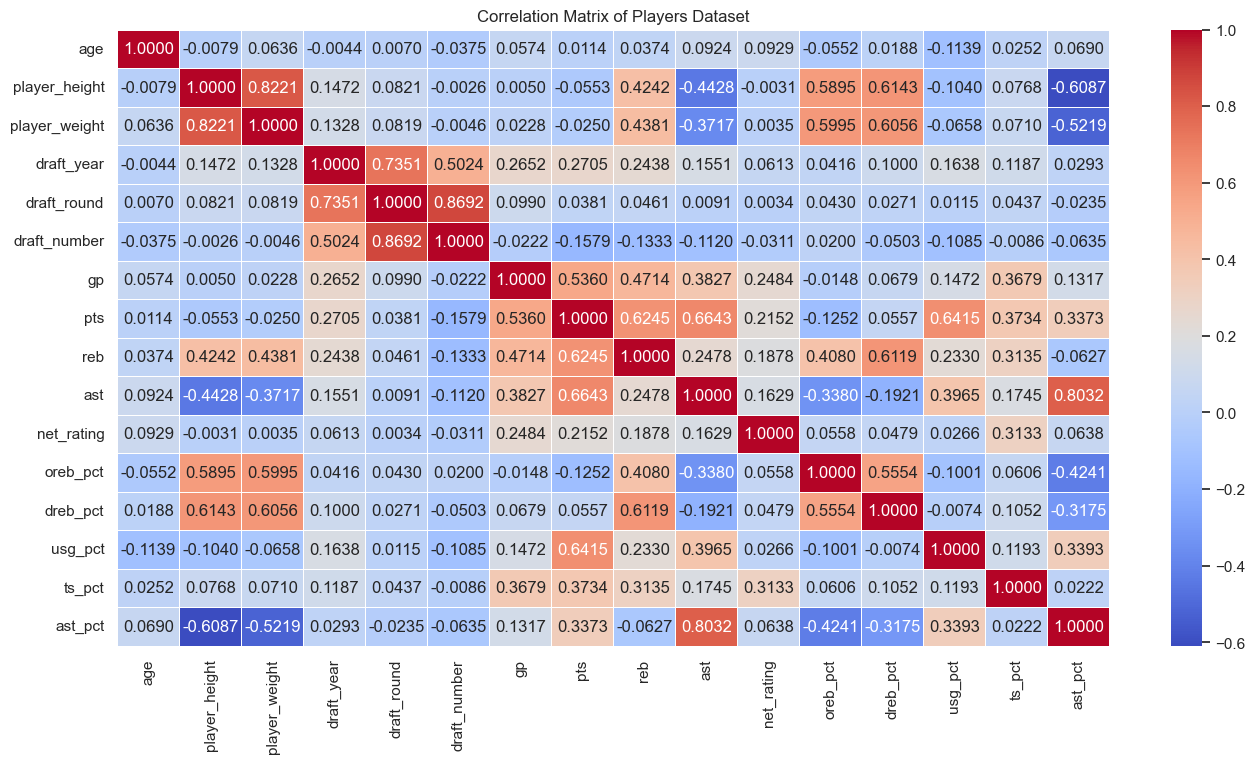

In [13]:
# Drop the 'player_name' column as it is a non-numeric feature
correlation_matrix = df.select_dtypes(exclude=['object']).corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(16, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)  # Create the heatmap with annotations
plt.title('Correlation Matrix of Players Dataset')  # Set the title of the plot
plt.show()  # Display the plo

Insights from the Correlation Heatmap:¶
1. (+)ve correlation
    * (pts) is strongly (+)ve correlated with ast(0.6643), usg_pct(0.6415), reb(0.6245), & gp(0.5360).
    * (pts) is moderatly (+)ve correlated with ts_pct(0.3734), & ast_pct(0.3373).
    * (pts) is weakly (+)ve correlated with draft_year(0.2705), & net_rating(0.2152).
2. (-)ve correlation
    * (pts) is weakly (-)ve correlated with draft_number(-0.1579), & oreb_pct(-0.1252).

In [14]:
# Get correlations with the target variable 'pts'
pts_correlation = correlation_matrix['pts']

# Select columns based on the correlation thresholds:
selected_columns = pts_correlation[(pts_correlation > 0.2) | # Select features with a correlation greater than 0.20 with PTS
                                   (pts_correlation < -0.1)  # Select features with a correlation less than -0.10 with PTS
                                   ].index.tolist()

# Display the selected columns
selected_columns

['draft_year',
 'draft_number',
 'gp',
 'pts',
 'reb',
 'ast',
 'net_rating',
 'oreb_pct',
 'usg_pct',
 'ts_pct',
 'ast_pct']

In [16]:
# The columns that we will be making predictions with.
X = df[selected_columns].drop(columns=['pts'])  # Select the feature columns, excluding 'pts' (target)

# The column that we want to predict.
Y = df['pts']  # Set 'pts' as the target variable (points scored by players)

In [17]:
X.info()### Feature Importance Summary:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   draft_year    12844 non-null  int32  
 1   draft_number  12844 non-null  int32  
 2   gp            12844 non-null  int64  
 3   reb           12844 non-null  float64
 4   ast           12844 non-null  float64
 5   net_rating    12844 non-null  float64
 6   oreb_pct      12844 non-null  float64
 7   usg_pct       12844 non-null  float64
 8   ts_pct        12844 non-null  float64
 9   ast_pct       12844 non-null  float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 903.2 KB


1. draft_year & draft_number: Indicate potential, with higher draft picks often correlating to better performance, but are less direct predictors of current performance.
2. gp (Games Played): Shows a player’s experience, but more games played does not necessarily mean better performance.
3. pts (Points): A direct measure of offensive performance, highly important in predicting player success.
4. reb (Rebounds): Reflects all-around involvement, especially in defense, and contributes to performance.
5. ast (Assists): Indicates playmaking ability, vital for team success.
6. net_rating: Measures overall efficiency; a high rating means a positive impact on both offense and defense.
7. oreb_pct (Offensive Rebound Percentage): Indicates a player’s hustle and ability to extend possessions, important for role players.
8. usg_pct (Usage Percentage): Reflects offensive involvement; higher values often correlate with better scorers.
10. ts_pct (True Shooting Percentage): Measures scoring efficiency, crucial for determining effective scorers.

Key Contributors:
1. Strong: ast, usg_pct, reb,& gp
2. Moderate: ts_pct, & ast_pct
3. Weaker: draft_year, net_rating, draft_number, & oreb_pct

# Model Traning

In [19]:
# Initialize transformers for scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
scaler = StandardScaler()  # Standardize numerical features (mean=0, std=1)

# Transform numerical columns
X = scaler.fit_transform(X)  # Apply scaling to numerical data

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)  
# 75% for training, 25% for testing

In [21]:
# Creating and training a Linear Regression model
linear_model = LinearRegression()  # Instantiating the LinearRegression model
linear_model.fit(X_train, Y_train)  # Fitting the model on the training data

# Making predictions on the test set
Y_pred_linear = linear_model.predict(X_test)  # Predicting points (Y) for test data

# Evaluating the model performance using different metrics
mse_linear = mean_squared_error(Y_test, Y_pred_linear)  # Calculating Mean Squared Error
r_squared_linear = r2_score(Y_test, Y_pred_linear)  # Calculating R-squared value
mae_linear = mean_absolute_error(Y_test, Y_pred_linear)  # Calculating Mean Absolute Error

In [22]:
# Creating and training a Ridge Regression model with regularization
ridge_model = Ridge()  # Instantiating the Ridge model
ridge_model.fit(X_train, Y_train)  # Fitting the model on the training data

# Making predictions on the test set
Y_pred_ridge = ridge_model.predict(X_test)  # Predicting points (Y) for the test data

# Evaluating the model performance using different metrics
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)  # Calculating Mean Squared Error
r_squared_ridge = r2_score(Y_test, Y_pred_ridge)  # Calculating R-squared value
mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge)  # Calculating Mean Absolute Error

In [23]:
# Creating a comparison dataset using the results of both models
comparison_data = {
    'Metric': ['Mean Squared Error (MSE)', 'R-Squared (R²)', 'Mean Absolute Error (MAE)'],
    'Linear Regression': [mse_linear, r_squared_linear, mae_linear],
    'Ridge Regression': [mse_ridge, r_squared_ridge, mae_ridge]
}

# Converting the dictionary into a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_data)

# Printing the comparison dataset
comparison_df.head()

,Metric,Linear Regression,Ridge Regression
0,Mean Squared Error (MSE),4.422493,4.422820
1,R-Squared (R²),0.877691,0.877682
2,Mean Absolute Error (MAE),1.477551,1.477690


# Conclusion:
The performance of Linear Regression and Ridge Regression is nearly identical, with only slight differences in the metrics. Both models have almost the same Mean Squared Error (MSE), R-Squared (R²), and Mean Absolute Error (MAE) values. This suggests that the regularization in Ridge Regression does not provide a significant improvement over Linear Regression for this dataset.

Therefore, both models perform similarly, with Linear Regression being a simpler and effective choice.